In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

問題を理解する:各変数を見て、この問題の意味と重要性について哲学的分析を行います。

単変量研究。:従属変数（ 'SalePrice'）に焦点を合わせて、それについてもう少し知りましょう。

多変量研究:従属変数と独立変数がどのように関係するかを理解しようとします。

基本的なクリーニング:データセットをクリーンアップし、不足しているデータ、外れ値、カテゴリ変数を処理します。

テストの前提:データがほとんどの多変量テクニックで必要な仮定を満たしているかどうかを確認します。

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

だから...私たちは何を期待できますか？

データを理解するために、各変数を見て、その問題の意味と関連性を理解しようとすることができます。 これには時間がかかることはわかっていますが、データセットのフレーバーがわかります。

分析にある程度の規律を持たせるために、次の列を含むExcelスプレッドシートを作成できます。

変数-変数名。

タイプ-変数のタイプの識別。 このフィールドには、「数値」または「カテゴリ」の2つの値があります。 「数値」とは、値が数値である変数を意味し、「カテゴリー」とは、値がカテゴリーである変数を意味します。

セグメント-変数のセグメントの識別。 建物、スペース、場所の3つのセグメントを定義できます。 「建物」と言うとき、建物の物理的特性に関連する変数を意味します（例：「OverallQual」）。 「スペース」と言うときは、家のスペースプロパティを報告する変数を意味します（例：「TotalBsmtSF」）。 最後に、「場所」と言うときは、家の場所に関する情報を提供する変数を意味します（例：「近隣」）。

期待-「SalePrice」の変動の影響についての期待。 可能な値として「高」、「中」、「低」のカテゴリースケールを使用できます。

結論-データを簡単に確認した後、変数の重要性についての結論。 「期待値」と同じカテゴリスケールを維持できます。

コメント-発生した一般的なコメント。

「タイプ」と「セグメント」は将来の参照用にすぎませんが、「期待」の列は「第六感」の開発に役立つため重要です。 この列を埋めるには、すべての変数の説明を読み、1つずつ確認してください。

家を買うときにこの変数について考えますか？ （たとえば、夢の家について考えるとき、その「石材突き板タイプ」を気にしますか？）
もしそうなら、この変数はどれほど重要ですか？ （例えば、「悪い」の代わりに「優れた」素材を外装に持つことの影響は？また、「良い」の代わりに「優れた」素材を持つことの影響は？）
この情報は他の変数ですでに説明されていますか？ （たとえば、「LandContour」がプロパティの平坦性を提供する場合、「LandSlope」を本当に知る必要がありますか？）

この困難な演習の後、スプレッドシートをフィルター処理して、「高」「期待」の変数を注意深く調べることができます。 次に、これらの変数と「SalePrice」の間の散布図に突入し、予想の修正である「結論」列に記入します。

このプロセスを経て、次の変数がこの問題で重要な役割を果たすことができると結論付けました。

OverallQual（計算方法がわからないので気に入らない変数です。他のすべての変数を使用して「OverallQual」を予測するのが面白い演習です）。
YearBuilt。
TotalBsmtSF。
GrLivArea。

最終的に、2つの「建物」変数（「OverallQual」および「YearBuilt」）と2つの「スペース」変数（「TotalBsmtSF」および「GrLivArea」）になりました。 重要なのは「場所、場所、場所」だけであるという不動産マントラに反するため、これは少し予想外かもしれません。 この迅速なデータ検査プロセスは、カテゴリー変数に対して少し厳しいものであった可能性があります。 たとえば、「Neigborhood」変数のほうが関連性が高いと予想していましたが、データ調査の後、除外しました。 たぶん、これはカテゴリ変数の視覚化により適した箱ひげ図の代わりに散布図の使用に関連しています。 データを視覚化する方法は、しばしば結論に影響します。

ただし、この演習の主なポイントは、データと期待されるアクションについて少し考えることでした。そのため、目標を達成したと思います。 さあ、「会話を少し減らして、もう少し行動を起こしてください」の時間です。 振ってみよう！

2.まず最初に：「SalePrice」の分析

「SalePrice」が私たちの探求の理由です。 パーティーに行くときのようです。 常にそこにいる理由があります。 通常、女性がその理由です。 （免責事項：好みに応じて、男性、ダンス、またはアルコールに適応させてください）

女性のアナロジーを使用して、「SalePriceにどのように出会ったか」という小さな物語を作りましょう。

ダンスパートナーを探していたときに、すべてがKaggleパーティーで始まりました。 ダンスフロアでしばらく検索した後、バーの近くでダンスシューズを使用している女の子を見ました。 それは彼女が踊るためにそこにいるというサインです。 私たちは予測モデリングに多くの時間を費やし、分析コンテストに参加しているため、女の子と話すことは私たちの超大国の1つではありません。 それでも、試してみました：

「こんにちは、カグリです！ あなたも？ 'セールスプライス'？ なんて美しい名前でしょう！ 「SalePrice」を知っていますが、あなたに関するデータを教えていただけますか？ 2人の人間関係が成功する確率を計算するモデルを開発しました。 私たちにそれを適用したい！」

In [4]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

「非常に良い...あなたの最低価格はゼロよりも大きいようです。 優れた！ あなたは私のモデルを破壊するような個人的な特徴の一つを持っていません！ 私に送れる写真はありますか？ 私は知らない...あなたはビーチで...または多分ジムでの自撮り？」

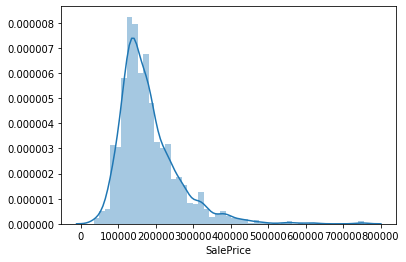

In [5]:
sns.distplot(df_train["SalePrice"])

ああ！ 外出するときにシーボーンメイクを使用していることがわかります...それはとてもエレガントです！ 私もあなたを見ています：

・正規分布から外れます。
・かなりの正の歪度があります。
・ピークを表示します。
これは面白くなってきています！ 「SalePrice」、あなたの体の測定値を教えてもらえますか？」

In [6]:
print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


「すごい！ 私の愛の計算機が正しければ、成功確率は97.834657％です。 また会うべきだと思います！ 来週の金曜日に空きがある場合は、私の番号を保持して電話をください。 しばらくお待ちください、ワニ！」

「SalePrice」、彼女の仲間と彼女の興味

あなたが戦う地形を選択することは軍事的知恵です。 「SalePrice」が去るとすぐに、Facebookに行きました。 はい、今、これは深刻になっています。 これはストーカーではないことに注意してください。 あなたが私の言いたいことを知っていれば、それは個人の単なる集中的な研究です。

彼女のプロフィールによると、私たちには共通の友人がいます。 チャックノリス以外にも、「GrLivArea」と「TotalBsmtSF」を知っています。 さらに、「OverallQual」や「YearBuilt」などの共通の利益もあります。 これは有望に見えます！

私たちの研究を最大限に活用するために、私たちは一般的な友人のプロフィールを注意深く見ることから始め、後で私たちの共通の利益に焦点を合わせます。

数値変数との関係

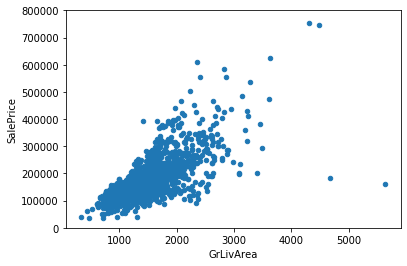

In [7]:
#散布図grlivarea / saleprice
var="GrLivArea"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000));

うーん...「SalePrice」と「GrLivArea」は本当に古い友人で、直線的な関係にあるようです。

「TotalBsmtSF」はどうですか？

In [2]:
#散布図totalbsmtsf / saleprice
var="TotalBsmtSF"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000));

NameError: name 'pd' is not defined

「TotalBsmtSF」も「SalePrice」の素晴らしい友人ですが、これははるかに感情的な関係のようです！ すべてが大丈夫で、突然、強い線形（指数関数的？）反応で、すべてが変わります。 さらに、「TotalBsmtSF」が時々閉じて「SalePrice」にゼロクレジットを与えることがあることは明らかです。

カテゴリ機能との関係

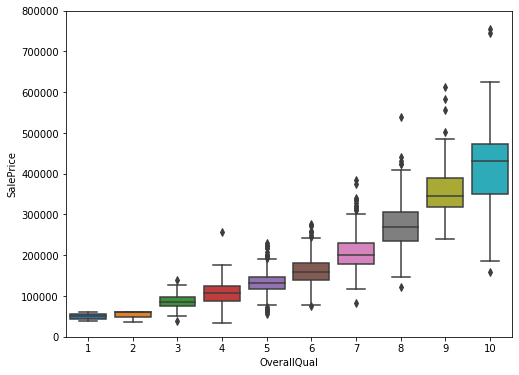

In [9]:
#箱ひげ図総合的/販売価格
var="OverallQual"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000);


すべてのかわいい女の子のように、「SalePrice」は「OverallQual」を楽しんでいます。 自己への注意：マクドナルドが最初の日付に適しているかどうかを検討してください。

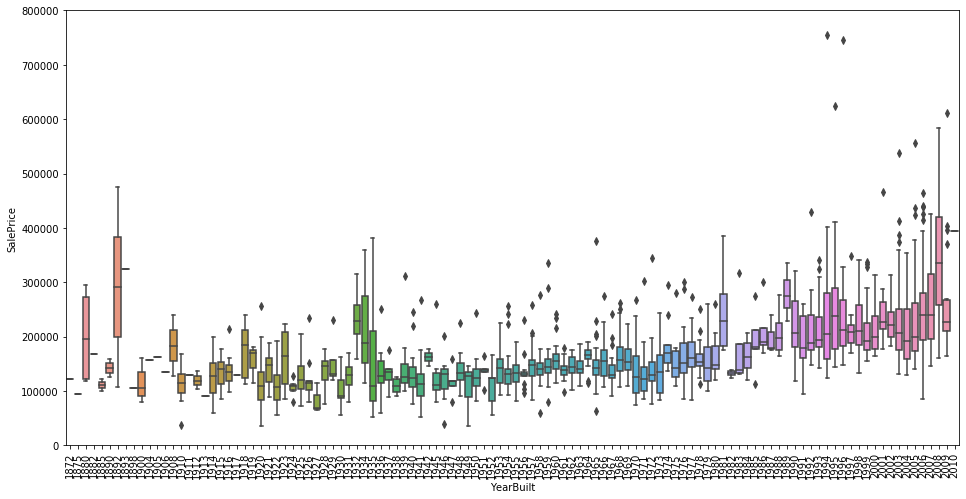

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

強い傾向ではありませんが、「SalePrice」は、古い遺物よりも新しいものにより多くのお金を費やす傾向があると思います。

注：「SalePrice」が定価であるかどうかはわかりません。 定価はインフレの影響を取り除こうとします。 「SalePrice」が定価でない場合は、そうである必要があるため、価格は長年にわたって比較できます。

要約すれば
ストーリーは別として、次のように結論付けることができます。

「GrLivArea」および「TotalBsmtSF」は、「SalePrice」と直線的に関連しているようです。 両方の関係はポジティブです。つまり、1つの変数が増加すると、他の変数も増加します。 「TotalBsmtSF」の場合、線形関係の勾配が特に高いことがわかります。
「OverallQual」と「YearBuilt」も「SalePrice」と関連しているようです。 「OverallQual」の場合、ボックスプロットは全体的な品質に応じて販売価格がどのように上昇するかを示しているため、関係はより強いようです。
4つの変数を分析しただけですが、他にも分析すべき多くの要素があります。 ここでのトリックは、適切な機能の選択（機能選択）であり、それらの間の複雑な関係の定義（機能エンジニアリング）ではないようです。

そうは言っても、小麦をもみ殻から分離しましょう。

3.冷静を保ち、賢く働く

今まで、私たちは直観に従って、重要だと思った変数を分析しました。 分析に客観的な性格を与える努力にもかかわらず、出発点は主観的であると言わなければなりません。

エンジニアとして、私はこのアプローチに不安を感じています。 私のすべての教育は、主観の風に耐えることができる、規律のある精神を発達させることでした。 それには理由があります。 構造工学で主観的になろうとすると、物理学が物事を崩壊させるのがわかります。 痛いことがあります。

それでは、慣性を克服し、より客観的な分析を行いましょう。

「プラズマスープ」
「最初はプラズマスープ以外は何もありませんでした。 宇宙論の研究の開始時点で、これらの短い時間で知られていることは、大部分推測的です。 しかし、科学は、今日の宇宙について知られていることに基づいて、おそらく何が起こったのかのスケッチを考案しました。 （ソース：http://umich.edu/~gs265/bigbang.htm）

宇宙を探索するために、「プラズマスープ」を理解するための実用的なレシピから始めます。

相関行列（ヒートマップスタイル）。
「SalePrice」相関行列（ズームされたヒートマップスタイル）。
最も相関のある変数間の散布図（ジャガースタイルのように移動）。
相関行列（ヒートマップスタイル

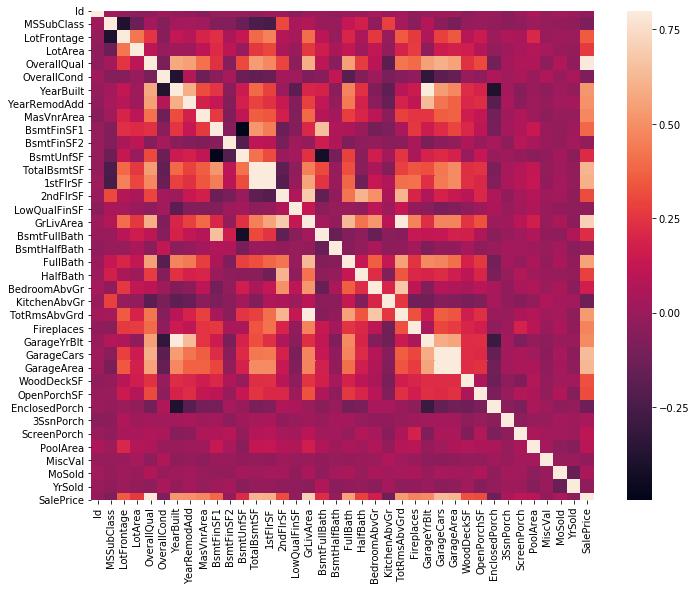

In [11]:
#相関行列
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True);

私の意見では、このヒートマップは「プラズマスープ」とその関係の概要をすばやく取得するための最良の方法です。 （@seabornありがとう！）

一目見ただけで、2つの赤い正方形が注目を集めています。最初の変数は「TotalBsmtSF」および「1stFlrSF」変数を指し、2番目の変数は「GarageX」変数を指します。どちらの場合も、これらの変数間の相関がどれほど重要かを示しています。実際、この相関は非常に強いため、多重共線性の状況を示すことができます。これらの変数について考えてみると、それらはほぼ同じ情報を与えていると結論付けられるため、多重共線性が実際に発生します。ヒートマップはこの種の状況を検出するのに最適であり、機能選択に支配される問題では、私たちのように、それらは不可欠なツールです。

私の注意を引いたもう1つのことは、「SalePrice」相関です。よく知られている「GrLivArea」、「TotalBsmtSF」、および「OverallQual」が大きな「Hi！」と言っているのを見ることができますが、考慮すべき他の多くの変数も見ることができます。それが私たちが次にすることです。

「SalePrice」相関行列（ズームされたヒートマップスタイル）

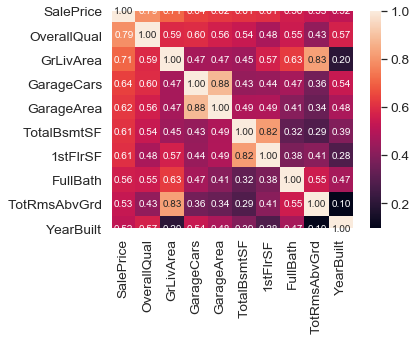

In [12]:
#セール価格相関行列
k=10#ヒートマップの変数の数
cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":10},yticklabels=cols.values,xticklabels=
              cols.values)
plt.show()

水晶玉によると、これらは「SalePrice」と最も相関する変数です。これに関する私の考え：

「OverallQual」、「GrLivArea」、および「TotalBsmtSF」は、「SalePrice」と強く相関しています。チェック！
「GarageCars」と「GarageArea」も、最も強く相関する変数の一部です。ただし、最後のサブポイントで説明したように、ガレージに収まる車の数はガレージエリアの結果です。 「GarageCars」と「GarageArea」は双子の兄弟のようなものです。それらを区別することはできません。したがって、分析にはこれらの変数のいずれかが必要です（「SalePrice」との相関が高いため、「GarageCars」を保持できます）。
「TotalBsmtSF」と「1stFloor」も双子の兄弟のようです。 「TotalBsmtSF」を保持して、最初の推測が正しかったことを伝えることができます（「だから...何が期待できますか？」を読み直してください）。
'FullBath' ??本当に？
「TotRmsAbvGrd」と「GrLivArea」、双子の兄弟。このデータセットはチェルノブイリのものですか？
あ...「YearBuilt」...「YearBuilt」は「SalePrice」とわずかに相関しているようです。正直なところ、「YearBuilt」について考えるのは怖いです。これを正しく行うには、時系列分析を少し行う必要があると感じ始めるからです。これを宿題として残しておきます。
散布図に進みましょう。

「SalePrice」と相関変数の間の散布図（ジャガースタイルのように移動）
これから見るものの準備をしてください。これらの散布図を初めて見たとき、私は完全に吹き飛ばされたことを告白しなければなりません！短いスペースにたくさんの情報があります...それは驚くべきことです。もう一度、ありがとう@seaborn！あなたは私を「ジャガーのように移動」させます！

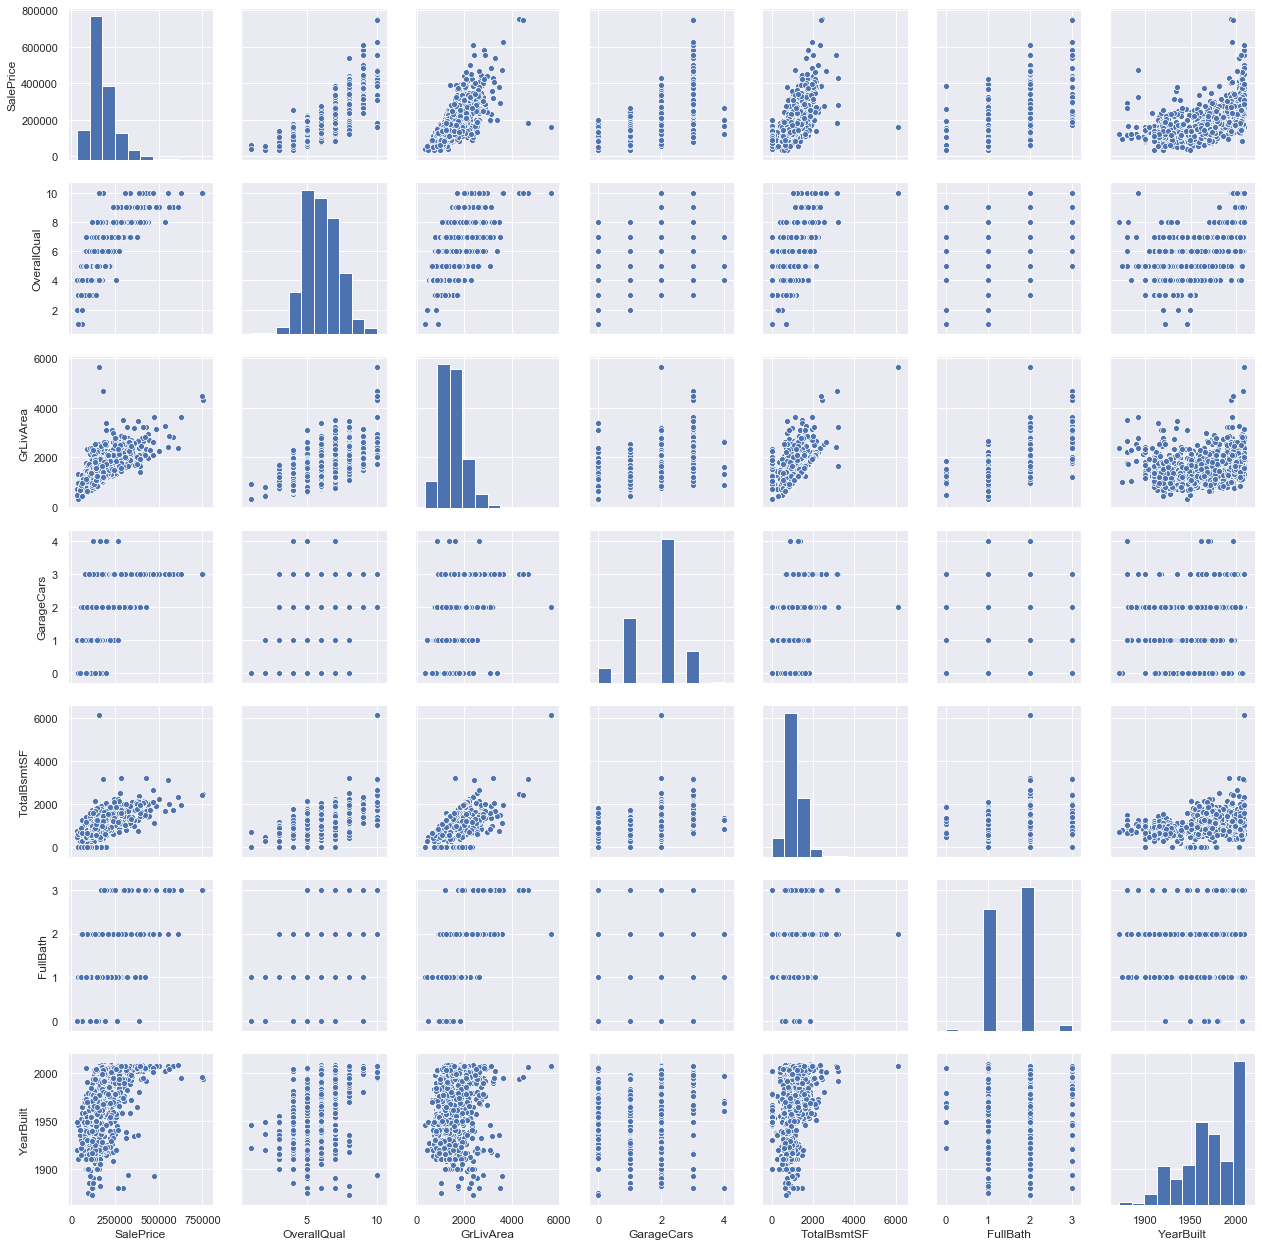

In [13]:
sns.set()
cols=["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]
sns.pairplot(df_train[cols],size=2.5)
plt.show()

すでにいくつかの主要な数値を知っていますが、この巨大な散布図は変数の関係について合理的な考えを与えてくれます。

興味深いと思われる数字の1つは、「TotalBsmtSF」と「GrLiveArea」の間の数字です。この図では、点が直線を描いており、ほとんど境界線のように機能しています。ドットの大部分がその線より下にとどまることは完全に理にかなっています。地下エリアは地上のリビングエリアと同じにすることができますが、地上のリビングエリアよりも大きい地下エリアは期待できません（バンカーを購入しようとしない限り）。

「SalePrice」と「YearBuilt」に関するプロットも考えさせられます。 「ドットクラウド」の下部には、内気な指数関数のように見える（創造的である）ものがあります。 「ドットクラウド」の上限でも同じ傾向が見られます（さらにクリエイティブになります）。また、過去数年間の一連の点がこの制限を上回っている傾向に注目してください（価格は現在急速に上昇していると言いたいだけです）。

さて、今のところロールシャッハのテストは十分です。欠落しているもの、つまりデータの欠落に進みましょう！

4.欠落データ
欠落データについて考える際の重要な質問：

・不足しているデータはどの程度普及していますか？
・欠損データはランダムですか、それともパターンがありますか？
データの欠落はサンプルサイズの縮小を意味する可能性があるため、これらの質問に対する答えは実用的な理由から重要です。これにより、分析を続行できなくなります。さらに、実質的な観点から、データが欠落しているプロセスに偏りがなく、不都合な真実が隠されないようにする必要があります。



In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


これを分析して、欠落データの処理方法を理解しましょう。

15％を超えるデータが欠落している場合は、対応する変数を削除し、存在しなかったふりをする必要があると考えます。これは、これらの場合に欠落データを埋めるためのトリックを試みないことを意味します。これによると、削除する必要がある変数のセット（「PoolQC」、「MiscFeature」、「Alley」など）があります。重要なのは、このデータを見逃すことになるのでしょうか？そうは思いません。これらの変数はどれも非常に重要ではないようです。なぜなら、それらのほとんどは家を購入する際に考えている側面ではないからです（データが欠落しているのはそのためでしょうか？）。さらに、変数を詳しく見ると、「PoolQC」、「MiscFeature」、「FireplaceQu」などの変数は外れ値の強力な候補であると言えるため、喜んで削除します。

残りのケースに関係することで、「GarageX」変数には同じ数の欠損データがあることがわかります。欠落データは同じ観測セットを参照しているに違いありません（確認しませんが、5％であり、20 in5の問題に費やすべきではありません）。ガレージに関する最も重要な情報は「GarageCars」で表され、欠落データの約5％について話していることを考慮して、前述の「GarageX」変数を削除します。同じロジックが「BsmtX」変数に適用されます。

「MasVnrArea」および「MasVnrType」に関して、これらの変数は必須ではないと考えることができます。さらに、これらはすでに検討されている「YearBuilt」および「OverallQual」と強い相関関係があります。したがって、「MasVnrArea」および「MasVnrType」を削除しても情報は失われません。

最後に、「電気」に1つの欠落した観測があります。これは1つの観測であるため、この観測を削除して変数を保持します。

要約すると、欠損データを処理するために、変数「Electrical」を除く欠損データを持つすべての変数を削除します。 「電気」では、欠損データのある観測を削除します

In [15]:
#欠落データの対処
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()#欠落しているデータがないことを確認するだけです...

0

嘘つきだ！
外れ値も注意すべき点です。 どうして？ 外れ値はモデルに著しく影響する可能性があり、貴重な情報源になる可能性があるため、特定の行動に関する洞察を提供します。

外れ値は複雑な問題であり、より注目に値します。 ここでは、「SalePrice」の標準偏差と一連の散布図を使用して、簡単な分析を行います。

単変量解析
ここでの主な関心事は、観測値を外れ値として定義するしきい値を確立することです。 そのために、データを標準化します。 これに関連して、データの標準化とは、データ値を平均が0、標準偏差が1になるように変換することです。

In [20]:
#データの標準化
saleprice_scaled=StandardScaler().fit_transform(df_train["SalePrice"][:,np.newaxis]);
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("outer range (low)of the distribution:")
print(low_range)
print("\nouter range (high) of the distribution:")
print(high_range)

outer range (low)of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


「SalePrice」は新しい服でどのように見えるか：

低範囲の値は似ており、0からそれほど離れていません。
高い範囲の値は0から遠く、7.somethingの値は実際に範囲外です。
今のところ、これらの値を外れ値とは見なしませんが、これら2つの値に注意する必要があります。

二変量解析
次の散布図を暗記しています。 しかし、新しい視点から物事を見るとき、常に何か発見することがあります。 アランケイが言ったように、「視点の変更は80 IQポイントの価値があります」。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


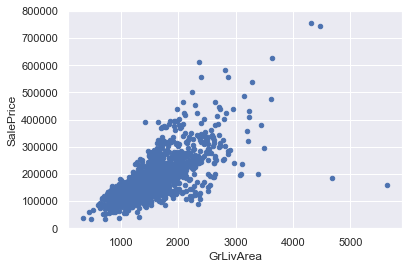

In [21]:
#二変量解析saleprice / grlivarea
var="GrLivArea"
data=pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000));

明らかになったこと：

「GrLivArea」が大きい2つの値は奇妙に見え、群衆に追従していません。 これが起こっている理由を推測できます。 たぶん、彼らは農業地域に言及しており、それが低価格を説明できるかもしれません。 これについては確信が持てませんが、これらの2つの点が典型的なケースを代表するものではないと確信しています。 したがって、それらを外れ値として定義し、削除します。
プロットの上部にある2つの観測は、注意が必要だと言った観測です。 これらは2つの特別なケースのように見えますが、傾向に従っているようです。 そのため、それらを保持します。

In [ ]:
#ポイントを削除する
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


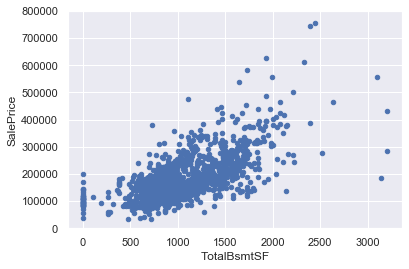

In [25]:
#二変量解析saleprice / grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

いくつかの観測値を削除したい気がするかもしれませんが（例：TotalBsmtSF> 3000）、それだけの価値はないと思います。 私たちはそれで生きることができるので、何もしません。

5.ハードコアの取得
Ayn Randの小説「Atlas Shrugged」には、よく繰り返される質問があります。JohnGaltは誰ですか？本の大部分は、この質問への答えを発見するための探求についてです。

今、ランディアンを感じています。 「SalePrice」とは誰ですか？

この質問に対する答えは、多変量解析の統計的基礎の基礎となる仮定のテストにあります。すでにいくつかのデータクリーニングを行い、「SalePrice」について多くのことを発見しました。ここで、「SalePrice」がどのように多変量手法を適用できる統計的仮定に準拠しているかを深く理解します。

ヘアらによると（2013）、4つの仮定をテストする必要があります。

正規性-正規性とは、データが正規分布のように見えることを意味します。いくつかの統計検定がこれに依存しているため（t統計など）、これは重要です。この演習では、 'SalePrice'の単変量正規性をチェックします（これは限定的なアプローチです）。単変量正規性は多変量正規性を保証するものではありません（これが必要です）が、それは役立ちます。考慮すべきもう1つの詳細は、大きなサンプル（200を超える観測）では、正規性はそのような問題ではないということです。ただし、正規性を解決する場合、他の多くの問題（ヘテロセダシティなど）を回避するため、この分析を行う主な理由です。

同相性-私はそれを正しく書いたことを願っています。同相性とは、「従属変数が予測変数の範囲全体で等しいレベルの分散を示すという仮定」を指します（Hair et al。、2013）。独立変数のすべての値でエラー項が同じになるようにしたいので、同相性が望ましいです。

線形性-線形性を評価する最も一般的な方法は、散布図を調べて線形パターンを検索することです。パターンが線形でない場合、データ変換を検討する価値があります。ただし、これまで見てきた散布図のほとんどは線形関係にあるように見えるので、これには触れません。

相関エラーの欠如-定義が示唆するように、あるエラーが別のエラーと相関すると、相関エラーが発生します。たとえば、1つの正のエラーが負のエラーを体系的に作成する場合、これらの変数間に関係があることを意味します。これは、時系列で頻繁に発生し、一部のパターンは時間に関連しています。また、これには入りません。ただし、何かを検出した場合は、得られる効果を説明できる変数を追加してください。これが相関エラーの最も一般的な解決策です。

エルビスはこの長い説明について何と言っていると思いますか？ 「少し会話を減らし、もう少し行動を起こしてください」？おそらく...ところで、エルヴィスの最後の大ヒットは何でしたか知っていますか？
バスルームの床。

正常性を求めて
ここでのポイントは、「SalePrice」を非常に無駄のない方法でテストすることです。 以下に注意してこれを行います。

ヒストグラム-尖度と歪度。
正規確率プロット-データ分布は、正規分布を表す対角線に厳密に従う必要があります。


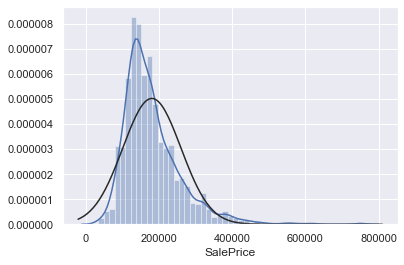

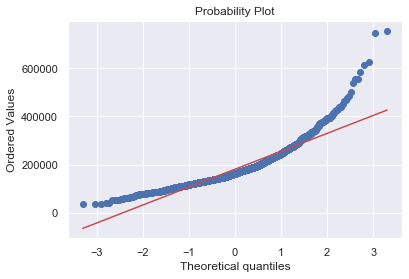

In [26]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train["SalePrice"],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train["SalePrice"],plot=plt)

[SalePrice]は正常ではありません。 それは「尖り」、正の歪度を示し、対角線には従いません。

しかし、すべてが失われるわけではありません。 単純なデータ変換で問題を解決できます。 これは、統計書で学べる素晴らしいことの1つです。正の歪度の場合、通常、ログ変換はうまく機能します。 これを発見したとき、ホグワーツの学生が新しいクールな呪文を発見したように感じました。

アバダ・ケダブラ！

In [28]:
#ログ変換の適用
df_train["SalePrice"]=np.log(df_train["SalePrice"])

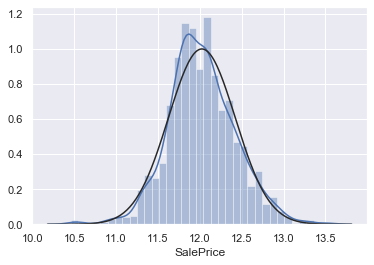

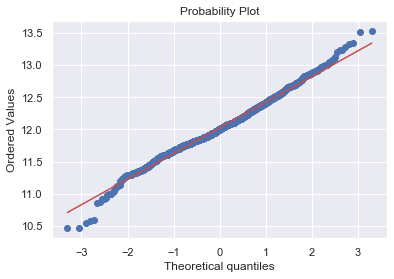

In [29]:
#変換されたヒストグラムと正規確率プロット
sns.distplot(df_train["SalePrice"],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train["SalePrice"],plot=plt)

できた！ 「GrLivArea」で何が起こっているのかを確認しましょう。

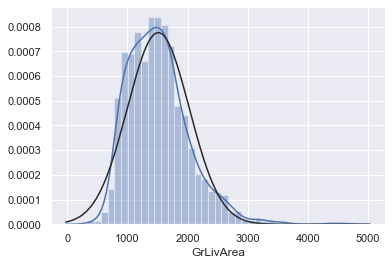

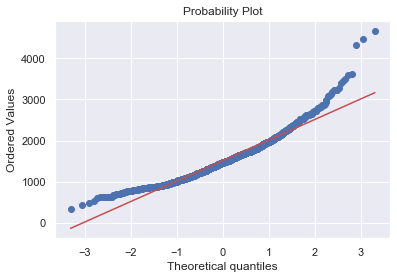

In [30]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train["GrLivArea"],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train["GrLivArea"],plot=plt)

歪度のような味... Avada kedavra！

In [32]:
#データ変換
f_train["GrLivArea"]=np.log(df_train["GrLivArea"])

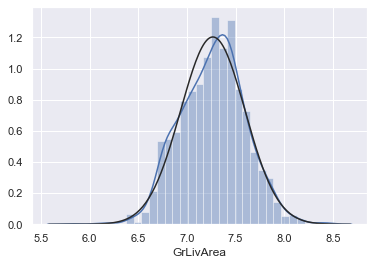

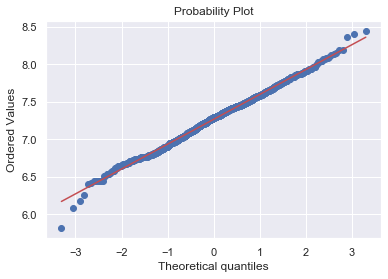

In [33]:
#変換されたヒストグラムと正規確率プロット
sns.distplot(df_train["GrLivArea"],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train["GrLivArea"],plot=plt)

次の方...

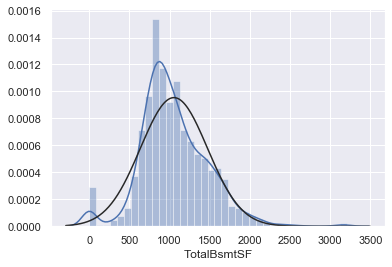

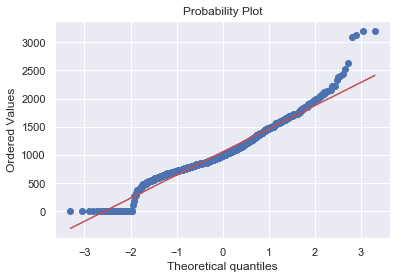

In [35]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train["TotalBsmtSF"],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train["TotalBsmtSF"],plot=plt)

わかりました、今私達は大きいボスを扱っています。 ここには何がありますか？

一般に、歪度を示すもの。
値がゼロのかなりの数の観測値（地下室のない家屋）。
大きな問題は、値ゼロではログ変換ができないためです。
ここでログ変換を適用するには、地下室の有無にかかわらず効果を得ることができる変数（バイナリ変数）を作成します。 次に、ゼロ以外のすべての観測値に対してログ変換を行い、値がゼロの観測値を無視します。 このようにして、地下室の有無にかかわらず、データを変換できます。

このアプローチが正しいかどうかはわかりません。 それは私にはちょうどいいように思えました。 それが私が「ハイリスクエンジニアリング」と呼んでいるものです。

In [36]:
#新しい変数の列を作成します（バイナリカテゴリ機能であるため、1つで十分です）
#area> 0の場合は1を取得し、area == 0の場合は0を取得します
df_train["HasBsmt"]=pd.Series(len(df_train["TotalBsmtSF"]),index=df_train.index)
df_train["HasBsmt"]=0
df_train.loc[df_train["TotalBsmtSF"]>0,"HasBsmt"]=1

In [37]:
#データを変換する
df_train.loc[df_train["HasBsmt"]==1,"TotalBsmtSF"]=np.log(df_train["TotalBsmtSF"])

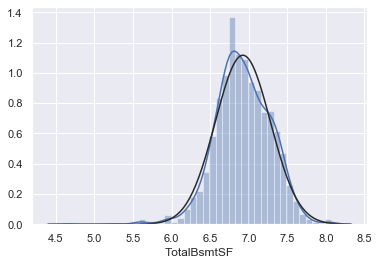

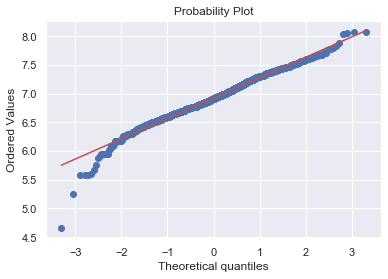

In [39]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train[df_train["TotalBsmtSF"]>0]["TotalBsmtSF"],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train[df_train["TotalBsmtSF"]>0]["TotalBsmtSF"],plot=plt)

最初の試みで「同相性」を書くための検索で¶
2つのメトリック変数の等分散性をテストする最良の方法は、グラフィカルです。 等分散からの逸脱は、円錐（グラフの片側で小さな分散、反対側で大きな分散）または菱形（分布の中心にある多数の点）などの形状で示されます。

「SalePrice」と「GrLivArea」から開始...

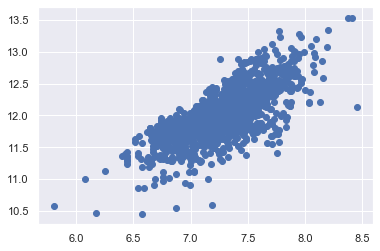

In [40]:
plt.scatter(df_train["GrLivArea"],df_train["SalePrice"]);

この散布図の古いバージョン（対数変換の前）は円錐形でした（戻って、「SalePrice」と相関変数（Jaggerスタイルのように移動）の間の散布図を確認してください）。 ご覧のとおり、現在の散布図は円錐形ではありません。 それが正常の力です！ いくつかの変数の正規性を保証するだけで、同分散性の問題を解決しました。

次に、「TotalBsmtSF」で「SalePrice」を確認しましょう。

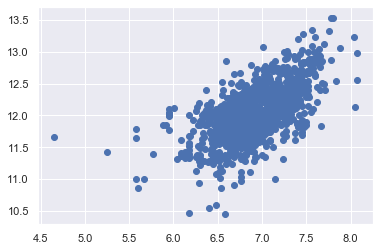

In [41]:
plt.scatter(df_train[df_train["TotalBsmtSF"]>0]["TotalBsmtSF"],df_train[df_train["TotalBsmtSF"]>0]["SalePrice"]);

一般に、「SalePrice」は「TotalBsmtSF」の範囲全体で等しいレベルの分散を示すと言えます。 クール！

最後になりましたが、ダミー変数
簡単モード。

In [42]:
df_train=pd.get_dummies(df_train)

結論
それでおしまい！ 演習は終わりました。

このカーネル全体で、Hair et al。によって提案された戦略の多くを実践しました。 （2013）。 変数を哲学し、「SalePrice」のみを分析し、最も相関のある変数で、欠落データと外れ値を処理し、いくつかの基本的な統計的仮定をテストし、カテゴリー変数をダミー変数に変換しました。 これは、Pythonが私たちをより簡単にするのを助けた多くの仕事です。

しかし、探求は終わっていません。 Facebookの調査で話が止まったことを思い出してください。 今度は、「SalePrice」に電話をかけて、彼女を夕食に招待します。 彼女の行動を予測してみてください。 彼女は正則化された線形回帰アプローチを楽しんでいる女の子だと思いますか？ それとも、彼女はアンサンブル法を好むと思いますか？ それとも他の何か？

調べるのはあなた次第です。